In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import quandl

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [3]:
quandl.ApiConfig.api_key = 'Rb-qxuH6ikTZq9zyzQzz'
data = quandl.get("FRED/DCOILBRENTEU", start_date="2000-01-01", end_date="2020-01-01")

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,Value
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


<AxesSubplot:xlabel='Date', ylabel='Crude Oil Price'>

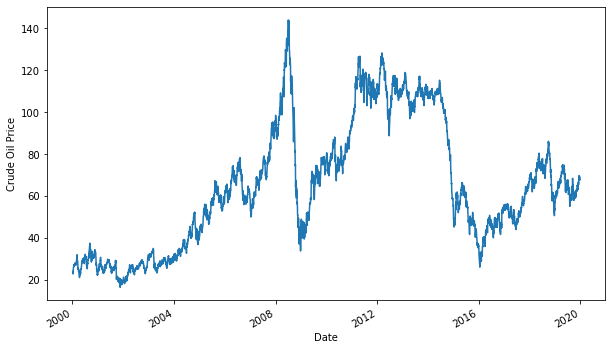

In [6]:
plt.ylabel("Crude Oil Price")
data.Value.plot(figsize=(10,6))

In [7]:
data['MA3'] = data['Value'].shift(1).rolling(window=3).mean()
data['MA9'] = data['Value'].shift(1).rolling(window=9).mean()

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Value    0
MA3      0
MA9      0
dtype: int64

In [10]:
X = data[['MA3', 'MA9']]

In [11]:
X.head()

,MA3,MA9
Date,,
2000-01-17,25.006667,24.032222
2000-01-18,25.463333,24.258889
2000-01-19,25.933333,24.546667
2000-01-20,26.156667,24.837778
2000-01-21,26.246667,25.161111


In [12]:
y = data['Value']

In [13]:
y.head()

Date
2000-01-17    25.99
2000-01-18    26.31
2000-01-19    26.17
2000-01-20    26.26
2000-01-21    27.18
Name: Value, dtype: float64

<AxesSubplot:xlabel='Date'>

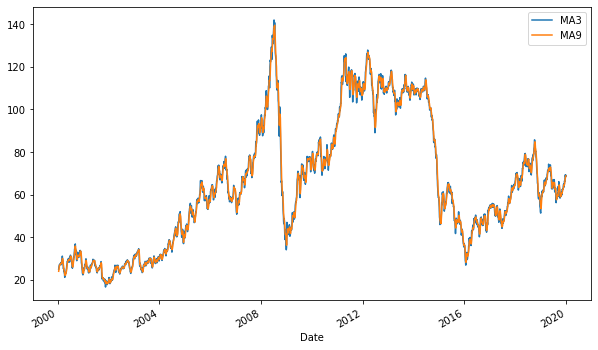

In [14]:
X.plot(figsize=(10,6))

In [15]:
training = 0.8
t = int(training*len(data))

X_train = X[:t]
y_train = y[:t]

X_test = X[t:]
y_test = y[t:]

In [16]:
lr_model = LinearRegression().fit(X_train, y_train)

In [17]:
predicted_price = lr_model.predict(X_test)

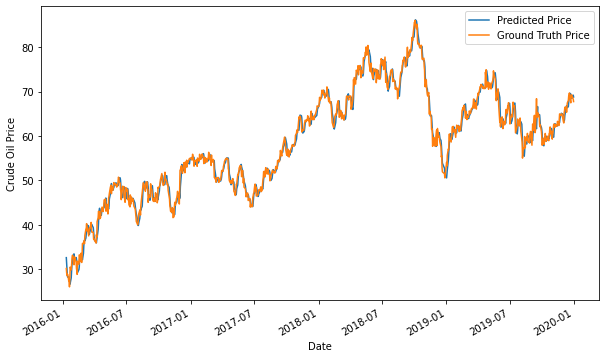

In [18]:
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10,6))
y_test.plot()
plt.legend(['Predicted Price', 'Ground Truth Price'])
plt.ylabel('Crude Oil Price')
plt.show()

In [19]:
mean_absolute_error(y_test, predicted_price)

1.086065310175654

In [22]:
R_squared_score =  lr_model.score(X[t:],y[t:])*100
acc = ("{0:.2f}".format(R_squared_score))
acc

'98.60'

In [23]:
data

,Value,MA3,MA9
Date,,,
2000-01-17,25.99,25.006667,24.032222
2000-01-18,26.31,25.463333,24.258889
2000-01-19,26.17,25.933333,24.546667
2000-01-20,26.26,26.156667,24.837778
2000-01-21,27.18,26.246667,25.161111
...,...,...,...
2019-12-24,69.26,68.616667,67.942222
2019-12-26,69.26,68.470000,68.374444
2019-12-27,68.91,68.670000,68.662222


In [25]:
X_new = pd.DataFrame()